# Lecture 5: Fourier Transform Properties


In [28]:
# Imports etc
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
from scipy import signal
import scipy.io as sio

font = {'weight' : 'normal',
        'size'   : 20}

# Definition of the Fourier Transform
The Fourier Transform (FT) for a continuous signal $f(x)$ is defined as follows:
$$\hat{f}(u) = \int_{-\infty}^{\infty} f(x) e^{-i 2 \pi x u} dx$$
Generally, this FT operation can be viewed as expressing a time-domain signal (if the variable $x$ corresponds to time) in terms of its temporal frequency components, or a spatial-domain signal in terms of its spatial frequency components. 


# Definition of the inverse Fourier Transform

The inverse Fourier Transform (iFT) can be expressed as follows: 
$$f(x) = \int_{-\infty}^{\infty} \hat{f}(u)  e^{i 2 \pi x u} d u$$
which is essentially the same expression as the FT, except the sign on the exponential is flipped. 
The signals $f(x)$ and $\hat{f}(u)$ are referred to as a Fourier Transform pair. 


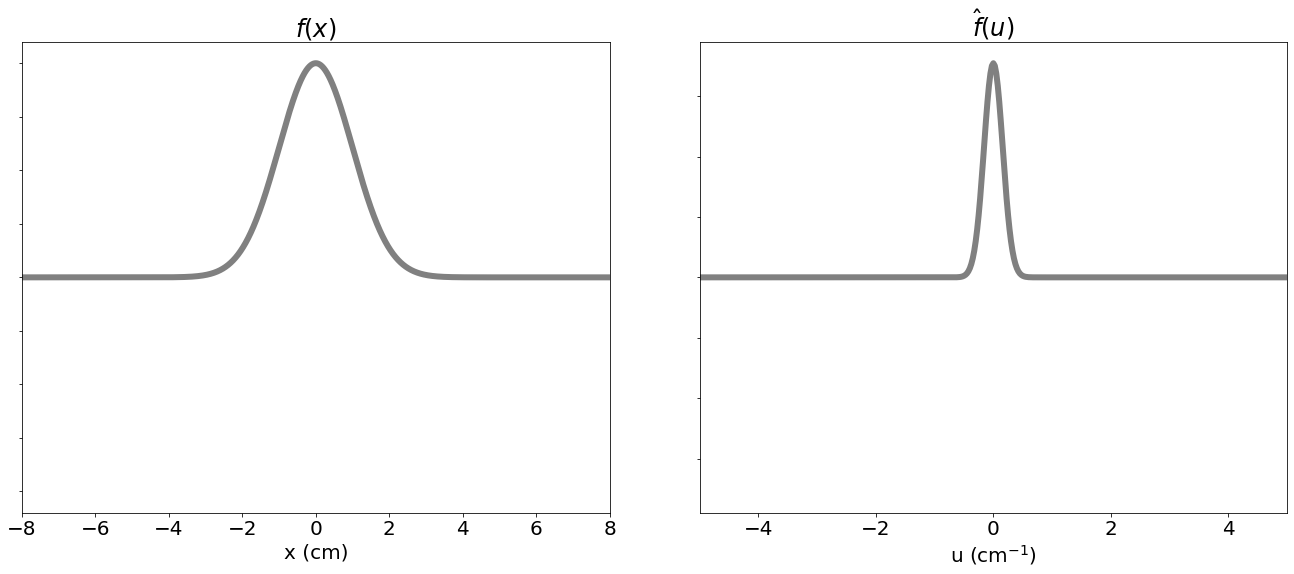

In [30]:
# Let's plot a signal and its FT
N = 20001
xmax = 20
x = np.linspace(-xmax,xmax,N)
dx = x[1] - x[0]
f = 1.0*(np.exp(-x*x/2))


# Calculate a (discrete) Fourier transform
umax = 1/(2*dx)
u = np.linspace(-umax,umax,N)
fhat = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(f)))/np.sqrt(len(f))


# Plot f and fhat
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.plot(x,np.real(f),'gray',linewidth=6.0)
plt.axis([-8,8,-1.1*np.max(np.abs(f)),1.1*np.max(np.abs(f))])
plt.tick_params(axis='y',labelleft=False)
plt.xlabel('x (cm)')
plt.title('$f(x)$')
plt.subplot(1,2,2)
plt.rc('font', **font)
plt.plot(u,np.real(fhat),'gray',linewidth=6.0)
plt.axis([-5,5,-1.1*np.max(np.abs(fhat)),1.1*np.max(np.abs(fhat))])
plt.tick_params(axis='y',labelleft=False)
plt.title('$\hat{f}(u)$')
plt.xlabel('u (cm$^{-1}$)')
plt.tight_layout(pad=4.0)


# Modulation property

For any signal $f_1(x)$  with FT $\hat{f}_1(u)$, the FT of its modulated version $f_2(x) = e^{i2 \pi x u_0  } f_1(x)$ is given by a translated version of $\hat{f}_1(u)$:
$$ \hat{f}_2(u) = \hat{f}_1(u - u_0)$$

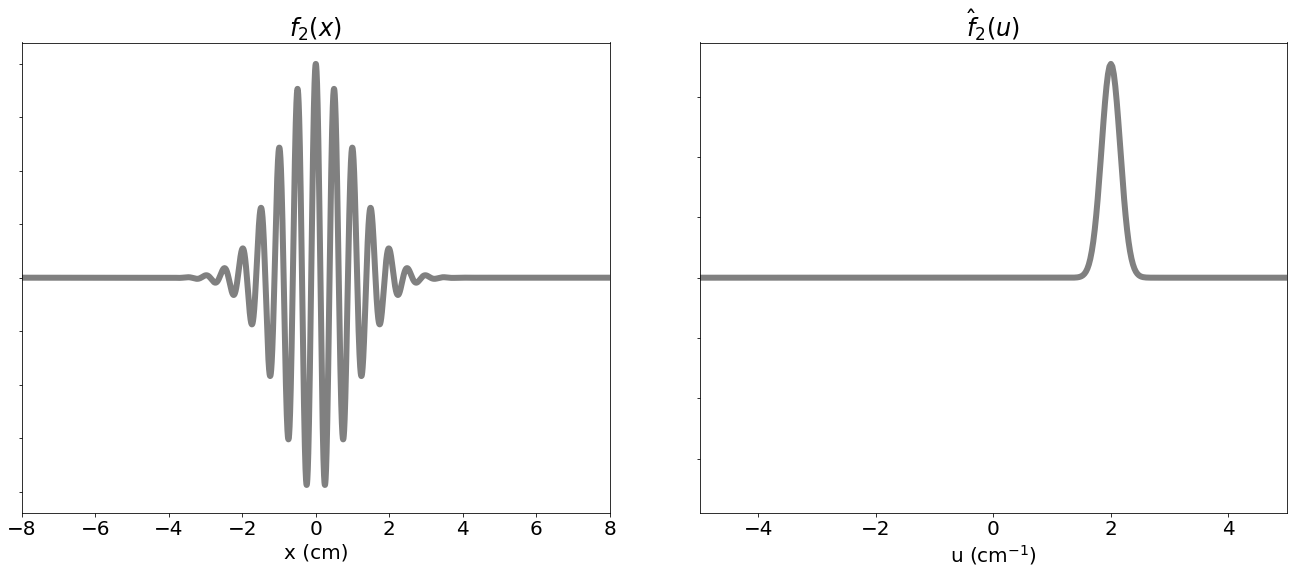

In [34]:
# Modulate by some frequency
u0 = 2 # Modulation frequency
f2 = f*np.exp(1j*2*np.pi*u0*x)
#f2 = f*np.cos(2*np.pi*u0*x)
fhat2 = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(f2)))/np.sqrt(len(f2)) 


# Plot f and fhat
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.plot(x,np.real(f2),'gray',linewidth=6.0)
plt.axis([-8,8,-1.1*np.max(np.abs(f2)),1.1*np.max(np.abs(f2))])
plt.tick_params(axis='y',labelleft=False)
plt.title('$f_2(x)$')
plt.xlabel('x (cm)')


plt.subplot(1,2,2)
plt.rc('font', **font)
plt.plot(u,np.real(fhat2),'gray',linewidth=6.0)
plt.axis([-5,5,-1.1*np.max(np.abs(fhat2)),1.1*np.max(np.abs(fhat2))])
plt.tick_params(axis='y',labelleft=False)
plt.xlabel('u (cm$^{-1}$)')
plt.title('$\hat{f}_2(u)$')
plt.tight_layout(pad=4.0)




# Spatial scaling.

For any signal $f_1(x)$  with FT $\hat{f}_1(u)$, the FT of its spatially scaled version $f_2(x) = f_1(a x)$ for any nonzero complex valued scalar $a$, is given by
$$\hat{f}_2(u) = \frac{1}{|a|} \hat{f}_1(\frac{u}{a})$$

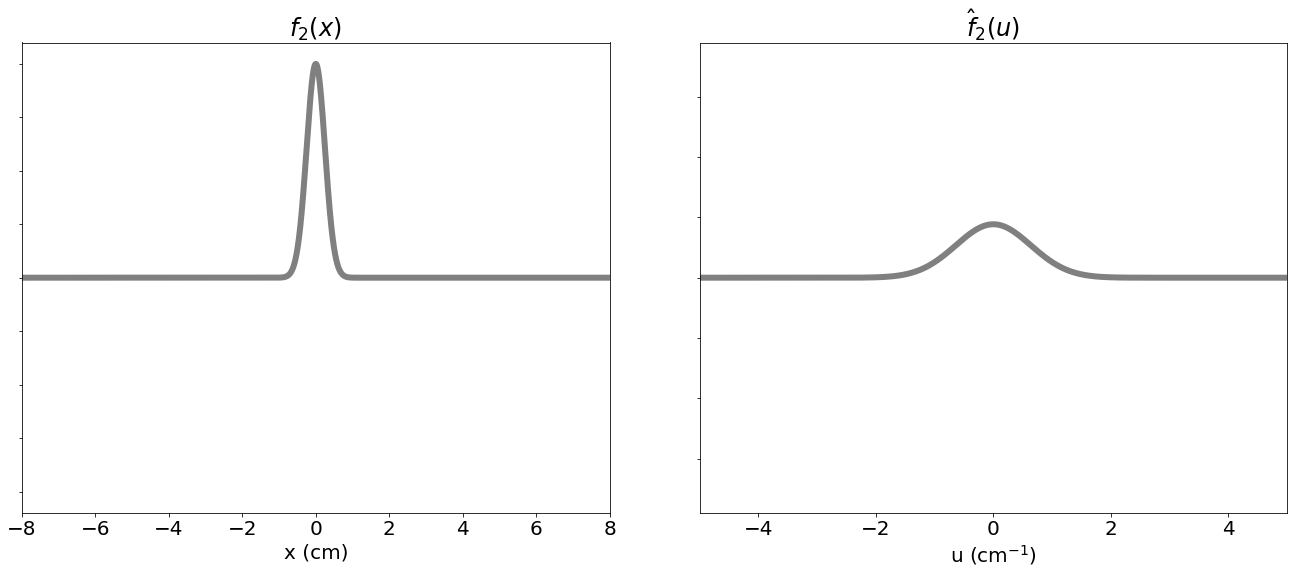

In [37]:
a = 4 # Spatial scaling factor
f2 = 1.0*(np.exp(-(a*x)*(a*x)/2))
fhat2 = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(f2)))/np.sqrt(len(f2)) 


# Plot f and fhat
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.plot(x,np.real(f2),'gray',linewidth=6.0)
plt.axis([-8,8,-1.1*np.max(np.abs(f2)),1.1*np.max(np.abs(f2))])
plt.tick_params(axis='y',labelleft=False)
plt.title('$f_2(x)$')
plt.xlabel('x (cm)')


plt.subplot(1,2,2)
plt.rc('font', **font)
plt.plot(u,np.real(fhat2),'gray',linewidth=6.0)
plt.axis([-5,5,-1.1*np.max(np.abs(fhat)),1.1*np.max(np.abs(fhat))])
plt.tick_params(axis='y',labelleft=False)
plt.xlabel('u (cm$^{-1}$)')
plt.title('$\hat{f}_2(u)$')
plt.tight_layout(pad=4.0)



## Convolution Theorem

For any FT pairs $f_1(x) \Leftrightarrow \hat{f}_1(u)$, and  $f_2(x) \Leftrightarrow \hat{f}_2(u)$, the convolution of $f_1$ and $f_2$, $f_3(x) = \left[ f_1 * f_2 \right] (x)$ has FT given by:
$$ \hat{f}_3(u) = \hat{f}_1(u) \cdot \hat{f}_2(u) $$
In other words, *convolution in the spatial domain becomes multiplication in the frequency domain*. Similarly, *multiplication in the spatial domain becomes convolution in the frequency domain*. This will become critical for understanding sampling, aliasing, and filtering. Further, this property will have important implications for the development of efficient algorithms in treatment planning, imaging, and many other applications. *Question: Can you think of why this may be?* 

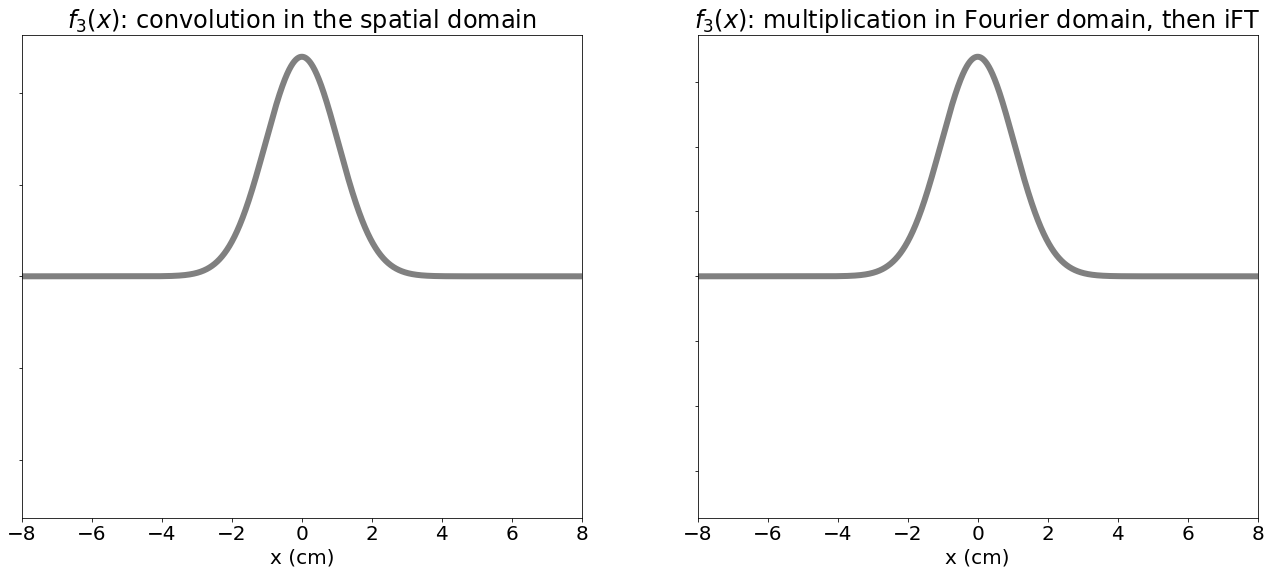

In [47]:
# Create a couple of signals to convolve
f1 = 1.0*(np.exp(-x*x/2))
f2 = 1.0*(np.abs(x)<0.5)

# Now convolve them 
f3 = signal.convolve(f1, f2, mode='same')

# Now go to the Fourier domain
fhat1 = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(f1)))/np.sqrt(len(f1))
fhat2 = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(f2)))/np.sqrt(len(f2))
fhat3 = fhat1*fhat2

# Now back to the spatial domain
f3b = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(fhat3)))*np.sqrt(len(f3))

# Plot f and fhat
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.plot(x,np.real(f3),'gray',linewidth=6.0)
plt.axis([-8,8,-1.1*np.max(np.abs(f3)),1.1*np.max(np.abs(f3))])
plt.tick_params(axis='y',labelleft=False)
plt.title('$f_3(x)$: convolution in the spatial domain')
plt.xlabel('x (cm)')

plt.subplot(1,2,2)
plt.rc('font', **font)
plt.plot(x,np.real(f3b),'gray',linewidth=6.0)
plt.axis([-8,8,-1.1*np.max(np.abs(f3b)),1.1*np.max(np.abs(f3b))])
plt.tick_params(axis='y',labelleft=False)
plt.title('$f_{3}(x)$: multiplication in Fourier domain, then iFT')
plt.xlabel('x (cm)')
plt.tight_layout(pad=4.0)
